## Drill: More clusters?

Your task is to take the $k$-means code here and see what happens when you change the value of $k$.  What solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor.  Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.

### Write up

Im not sure why you would want to use K-means for classification. It sucks, and there are a lot better approaches. Im also not sure how to leverage multiple k's for a binary problem. I dont see how you would assign which cluster to be which class.

In [9]:
######## Imports ###########
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from scipy.spatial.distance import cdist

%matplotlib inline

In [2]:
########## Bring In Data ##########
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

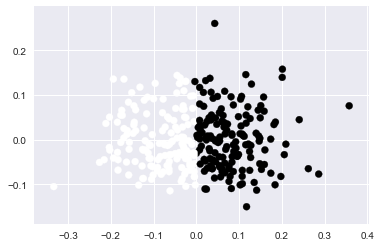

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [16]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(3).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

## Find Optimal Value of K
Will use the elbow method to do this. The idea is to run k-means clusterin on a given dataset over a range of k, and for each k. Calculate the Sum of squared errors (SSE) which is the inertia.

<function matplotlib.pyplot.show>

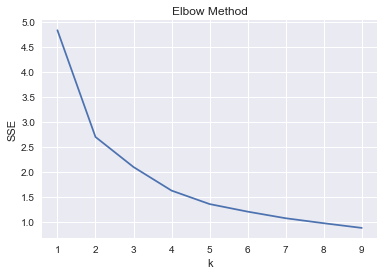

In [17]:
sse = {}
K = range(1,10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_pca)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show

It looks like 2 is the optimal k.

## Trying Different K.

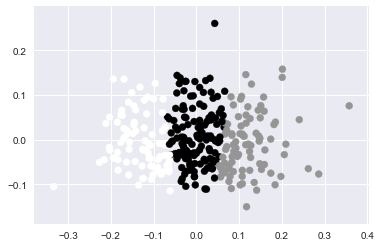

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      49  33
1      26  61
2      64  70


In [18]:
########### Trying k=3 ##############

# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(3).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))